In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import pylab             as pl
import numpy             as np
import matplotlib.pyplot as plt

from   astropy.table     import Table

In [3]:
sys.path.append(os.environ['HOME'])
sys.path.append(os.environ['HOME'] + '/DESI/')

In [4]:
os.environ['CODE_ROOT'] = os.environ['HOME'] + '/DESI/'

In [5]:
import pubplot

from   vmaxer      import vmaxer
from   smith_kcorr import test_plots, test_nonnative_plots
from   cosmo       import distmod, volcom
from   lumfn       import lumfn
from   schechter   import named_schechter
from   findfile    import findfile, fetch_header
from   poisson     import fillfactor_expectation
from   ddp_zlimits import ddp_zlimits
from   params      import fillfactor_threshold
from   volfracs    import eval_volavg_fillfactor, volavg_fillfactor
from astropy.table import Table

In [6]:
survey    = 'gama'
version   = 'GAMA4'
dryrun    = False

In [7]:
fpath     = findfile(ftype='ddp_n8', dryrun=dryrun, version=version, survey=survey)
gama_ddp  = Table.read(fpath)
gama_ddp

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,ZSURV,LUMDIST,DISTMOD,FIELD,IN_D8LUMFN,CONSERVATIVE,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,ROTCARTESIAN_X,ROTCARTESIAN_Y,ROTCARTESIAN_Z,GMR,DETMAG,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,MQZERO_0P0,Z_THETA_QALL,Z_THETA_QZERO,Z_THETA_QCOLOR,DDPKCORR_R0P1,DDPKCORR_G0P1,DDPKCORR_R0P0,DDPKCORR_G0P0,DDPMALL_0P0,DELTA_DETMAG_FAINT,ZMAX,ZMAX_WARN,DELTA_DETMAG_BRIGHT,ZMIN,ZMIN_WARN,VMAX,DDP [3],DDPZLIMS [3],RAND_N8,FILLFACTOR,BOUND_DIST,rRANDSEP,rRANDMATCH,rBOUND_DIST,rFILLFACTOR,DDP1_N8,DDP2_N8,DDP3_N8,DDP1_DELTA8,DDP1_DELTA8_TIER
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,,Mpc,,,,,,,,,,,mag,mag,,,,,,,,mag,mag,,,mag,mag,mag,,,,,,,,mag,mag,,,mag,,,,,,,,,,,,,,,,,
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float32,float64,float64,bytes3,int64,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,int32,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float32,float64,float64,float64,int64,int64,float64,float64,float64,float64,int64,float64,float64,int64,int64,int64,float64,int64
302523,587726032230285729,138.24107544,1.3898106,19.310106,0.16764,4,G09_Y1_GN2_387,6,20.884176,19.892538,19.333622,19.098059,19.157925,0.16764,567.5885680799823,38.77016819828783,G9,0,0,-362.5006147831849,323.6456274072515,11.790034707245052,360.24777609950615,-326.16542001143983,11.395234992742399,0.5589161,19.310106,0.44947958943753863,0,3,-0.09190520741951015,0.01753129506189649,0.09878359656519924,0.22966952698049942,0.42803016150364515,2.12,-0.1626108,-0.35539678,-19.396234718313032,-19.20344873999577,-19.558845517387205,38.70634099577885,38.868951794853025,38.51355501746159,-0.061355101375443914,0.057927197356676036,0.1553697769867572,0.3231024870703393,-19.45282089873459,0.48989296,0.2133479311066213,0.0,-7.3101063,0.005788281112758979,0.0,4203371.594730427,0 .. 0,1 .. 0,8544.0,1.0,13.666453353561545,0.9126157274813318,2034475,13.329145696204565,1.0,58,84,0,3.4327546709505548,7
69566,587722983348699216,175.44771129,0.10148011,18.58092,0.03966,4,G12_Y1_AN1_013,6,19.88805,18.912779,18.466942,18.23064,18.007154,0.03966,122.68342871487285,35.443929524975005,G12,2,0,-117.63096796700349,9.365781887576258,0.20900306222365378,117.56296059674986,-10.185776712557828,0.08016226562728043,0.44583702,18.58092,0.4879333442945132,0,3,-0.14648300185863028,-0.18857932527911986,0.05072731166270636,0.036843615892893145,0.4597207166438366,2.12,-0.0384702,-0.08407919,-16.875267369696353,-16.829658379801963,-16.91373757089064,35.45618663544342,35.49465683663771,35.41057764554903,-0.16153302305915562,-0.2141912621449974,0.05519185530304549,0.05098402756866588,-16.879731913336695,1.21908,0.06917900693999858,0.0,-6.5809193,0.0019437837332501502,0.0,156653.3082278379,0 .. 0,1 .. 1,5136.0,0.5986961273191796,2.9822296409583635,0.6122364871578405,2016950,2.4186837913823958,0.5712345172476045,1,1,6,-99.0,-99
78125,587722983366328655,215.75383617,0.13023629,19.602116,0.2377,4,G15_Y5_003_146,5,20.624166,19.927563,19.651224,19.482803,19.34569,0.2377,840.4516702177666,39.62256372295707,G15,0,0,-551.0657481877765,-396.766592666884,1.5434990568922213,553.8203024130299,392.91445096729393,0.9365510086970453,0.27633858,19.602116,0.059632267516942464,0,1,-0.2190692266760338,-0.0023629169224729935,-0.05778850736965971,0.12548169456615177,0.09306837533469633,2.12,-0.230569,-0.50392395,-19.73209057947138,-19.458735631904393,-19.96265958448389,39.3342062105749,39.56477521558741,39.06085126300791,-0.02611788668493953,0.250571435116781,0.19060699167726158,0.5157467248304443,-19.9804860785183,0.1978836,0.26557336204152554,0.0,-7.6021156,0.00649921

In [8]:
fpath     = findfile(ftype='zmax', dryrun=dryrun, version=version, survey=survey)
gama_zmax = Table.read(fpath)
gama_zmax

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,ZSURV,LUMDIST,DISTMOD,FIELD,IN_D8LUMFN,CONSERVATIVE,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,ROTCARTESIAN_X,ROTCARTESIAN_Y,ROTCARTESIAN_Z,GMR,DETMAG,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,MQZERO_0P0,Z_THETA_QALL,Z_THETA_QZERO,Z_THETA_QCOLOR,DDPKCORR_R0P1,DDPKCORR_G0P1,DDPKCORR_R0P0,DDPKCORR_G0P0,DDPMALL_0P0,DELTA_DETMAG_FAINT,ZMAX,ZMAX_WARN,DELTA_DETMAG_BRIGHT,ZMIN,ZMIN_WARN,VMAX
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,,Mpc,,,,,,,,,,,mag,mag,,,,,,,,mag,mag,,,mag,mag,mag,,,,,,,,mag,mag,,,mag,,,
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float32,float64,float64,bytes3,int64,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,int32,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float32,float64,float64,float64
302523,587726032230285729,138.24107544,1.3898106,19.310106,0.16764,4,G09_Y1_GN2_387,6,20.884176,19.892538,19.333622,19.098059,19.157925,0.16764,567.5885680799823,38.77016819828783,G9,0,0,-362.5006147831849,323.6456274072515,11.790034707245052,360.24777609950615,-326.16542001143983,11.395234992742399,0.5589161,19.310106,0.44947958943753863,0,3,-0.09190520741951015,0.01753129506189649,0.09878359656519924,0.22966952698049942,0.42803016150364515,2.12,-0.1626108,-0.35539678,-19.396234718313032,-19.20344873999577,-19.558845517387205,38.70634099577885,38.868951794853025,38.51355501746159,-0.061355101375443914,0.057927197356676036,0.1553697769867572,0.3231024870703393,-19.45282089873459,0.48989296,0.2133479311066213,0.0,-7.3101063,0.005788281112758979,0.0,4203371.594730427
69566,587722983348699216,175.44771129,0.10148011,18.58092,0.03966,4,G12_Y1_AN1_013,6,19.88805,18.912779,18.466942,18.23064,18.007154,0.03966,122.68342871487285,35.443929524975005,G12,0,0,-117.63096796700349,9.365781887576258,0.20900306222365378,117.56296059674986,-10.185776712557828,0.08016226562728043,0.44583702,18.58092,0.4879333442945132,0,3,-0.14648300185863028,-0.18857932527911986,0.05072731166270636,0.036843615892893145,0.4597207166438366,2.12,-0.0384702,-0.08407919,-16.875267369696353,-16.829658379801963,-16.91373757089064,35.45618663544342,35.49465683663771,35.41057764554903,-0.16153302305915562,-0.2141912621449974,0.05519185530304549,0.05098402756866588,-16.879731913336695,1.21908,0.06917900693999858,0.0,-6.5809193,0.0019437837332501502,0.0,156653.3082278379
78125,587722983366328655,215.75383617,0.13023629,19.602116,0.2377,4,G15_Y5_003_146,5,20.624166,19.927563,19.651224,19.482803,19.34569,0.2377,840.4516702177666,39.62256372295707,G15,0,0,-551.0657481877765,-396.766592666884,1.5434990568922213,553.8203024130299,392.91445096729393,0.9365510086970453,0.27633858,19.602116,0.059632267516942464,0,1,-0.2190692266760338,-0.0023629169224729935,-0.05778850736965971,0.12548169456615177,0.09306837533469633,2.12,-0.230569,-0.50392395,-19.73209057947138,-19.458735631904393,-19.96265958448389,39.3342062105749,39.56477521558741,39.06085126300791,-0.02611788668493953,0.250571435116781,0.19060699167726158,0.5157467248304443,-19.9804860785183,0.1978836,0.26557336204152554,0.0,-7.6021156,0.006499216208630515,0.0,7836894.982863354
92683,587722983903854830,217.20616405,0.62545319,17.007326,0.05125,5,344631501830252544,6,18.388035,17.37754,17.003227,16.775734,16.613625,0.05125,159.94313623875726,36.01982803805585,G15,0,0,-121.17146380955684,-91.99469525940498,1.660822274210822,121.81172981152636,91.14754897357581,1.5273259905315857,0.37431335,17.007326,0.4088576076707692,0,3,-0.12670920169668512,-0.1612534548751771,0.057562876439351374,0.03841825975780236,0.3934579711737365,2.12,-0.0497125,-0.10864999,-19.02035228

In [9]:
fpath     = findfile(ftype='vmax', dryrun=dryrun, version=version, survey=survey)
gama_vmax = Table.read(fpath)
gama_vmax

ZMAX,ZMIN,RA,DEC,ZSURV,FILLFACTOR,FIELD,IN_D8LUMFN,MCOLOR_0P0,MALL_0P0,VZ,VMAX,FILLFACTOR_VMAX
,,deg,deg,,,,,mag,mag,,,
float64,float64,float64,float64,float32,float64,bytes3,int64,float64,float64,float64,float64,float64
0.2133479311066213,0.01882999949157238,138.24107544,1.3898106,0.16764,1.0,G9,0,-19.20344873999577,-19.396234718313032,1363185.6982557715,2731617.296090517,0.6503519675006435
0.26557336204152554,0.01882999949157238,215.75383617,0.13023629,0.2377,1.0,G15,0,-19.458735631904393,-19.73209057947138,4062121.460744062,5563818.721665203,0.7102345334877893
0.19086586104485473,0.01882999949157238,217.20616405,0.62545319,0.05125,0.9576107254530882,G15,0,-18.961414796943874,-19.020352286930294,37624.354885268775,1877614.1180813634,0.6156100638228368
0.2715100049972534,0.01882999949157238,133.78634365,-0.47746874,0.23604,1.0,G9,0,-20.588747045982768,-20.548620245445658,3950841.0225641555,5876172.3796826145,0.7047028152469351
0.21118783500992613,0.01882999949157238,214.33021237,-0.39950955,0.14596,1.0,G15,0,-19.181164332852546,-19.34901831410903,906997.3793300109,2640561.706342258,0.6472786435691701
0.18100464886027348,0.01882999949157238,184.9882684,0.28593955,0.11244,0.9564450398469372,G12,0,-18.896392278238515,-19.0256982667887,389959.71910670045,1564879.7142640755,0.5979421398834555
0.16883602466501668,0.01882999949157238,178.29277894,-0.92227054,0.13817,1.0,G12,0,-19.064458922918515,-19.040970021362977,684878.7120345166,1227432.2031949144,0.5736418989241614
0.11938644608017883,0.01882999949157238,135.42809835,1.16626728,0.07135,0.9903664909859328,G9,0,-17.990105406108526,-18.07215790516439,73332.40517968821,338788.5374723498,0.43546640847870277


In [10]:
fpath

'/cosma/home/durham/dc-wils7/data/GAMA4/gama_gold_vmax.fits'

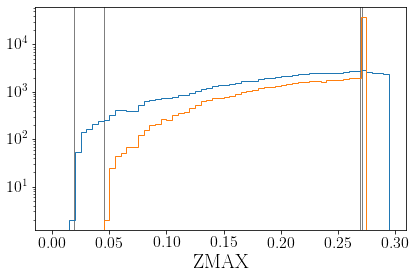

In [11]:
pl.axvline(ddp_zlimits['DDP1'][0], c='k', lw=0.5)
pl.axvline(ddp_zlimits['DDP1'][1], c='k', lw=0.5)

pl.axvline(gama_vmax.meta['FORCE_ZMIN'], c='k', lw=0.5) 
pl.axvline(gama_vmax.meta['FORCE_ZMAX'], c='k', lw=0.5) 

_ = pl.hist( gama_ddp['ZMAX'], bins=np.arange(0.0, 0.3, 0.005), histtype='step')
_ = pl.hist(gama_vmax['ZMAX'], bins=np.arange(0.0, 0.3, 0.005), histtype='step')

pl.xlabel('ZMAX')
pl.yscale('log')

In [12]:
ddp_zlimits

{'DDP1': [0.018824567924955588, 0.27151303002263294],
 'DDP2': [0.010920624935373494, 0.19364943378836194],
 'DDP3': [0.006922749951471983, 0.10152763865652228]}

Text(0, 0.5, '$z_{\\rm max}$')

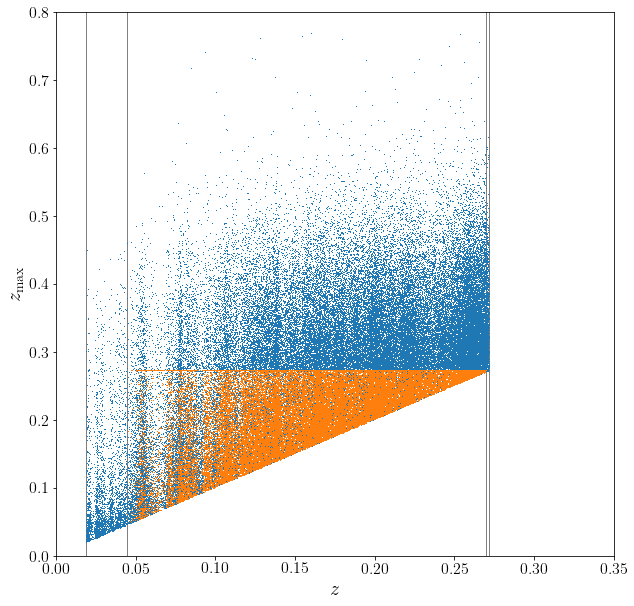

In [13]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

ax.axvline(ddp_zlimits['DDP1'][0], c='k', lw=0.5)
ax.axvline(ddp_zlimits['DDP1'][1], c='k', lw=0.5)

ax.axvline(gama_vmax.meta['FORCE_ZMIN'], c='k', lw=0.5) 
ax.axvline(gama_vmax.meta['FORCE_ZMAX'], c='k', lw=0.5) 

ax.plot( gama_ddp['ZSURV'], gama_zmax['ZMAX'], marker=',', lw=0.0)
ax.plot(gama_vmax['ZSURV'], gama_vmax['ZMAX'], marker=',', lw=0.0)

ax.set_xlim(0.0, 0.35)
ax.set_ylim(0.0, 0.80)

ax.set_xlabel(r'$z$')
ax.set_ylabel(r'$z_{\rm max}$')

Text(0, 0.5, '$z_{\\rm min}$')

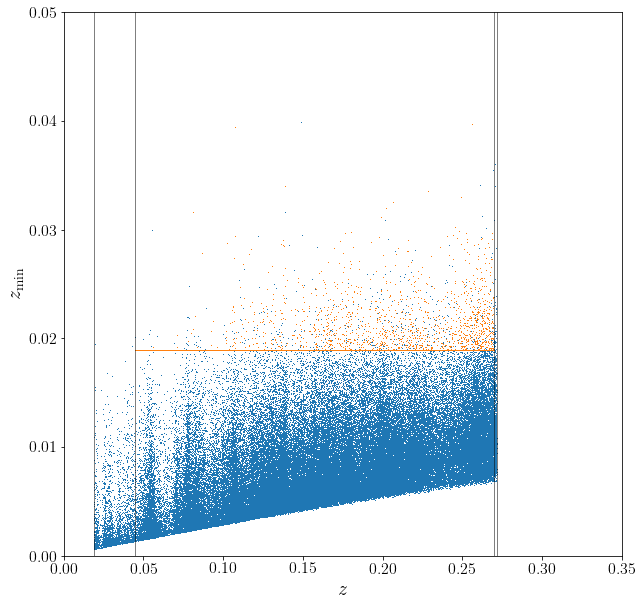

In [14]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

ax.plot( gama_ddp['ZSURV'], gama_zmax['ZMIN'], marker=',', lw=0.0)
ax.plot(gama_vmax['ZSURV'], gama_vmax['ZMIN'], marker=',', lw=0.0)

ax.axvline(ddp_zlimits['DDP1'][0], c='k', lw=0.5)
ax.axvline(ddp_zlimits['DDP1'][1], c='k', lw=0.5)

ax.axvline(gama_vmax.meta['FORCE_ZMIN'], c='k', lw=0.5) 
ax.axvline(gama_vmax.meta['FORCE_ZMAX'], c='k', lw=0.5) 

ax.set_xlim(0.0, 0.35)
ax.set_ylim(0.0, 0.05)

ax.set_xlabel(r'$z$')
ax.set_ylabel(r'$z_{\rm min}$')

In [15]:
ddp1_full8frac = fetch_header(fpath=findfile(ftype='randoms_bd_ddp_n8', dryrun=False, field='GALL', prefix='randoms_ddp1'), name='DDP1_FULL8FRAC')

Text(0.5, 1.0, 'Fillfactor $\\geq$ 0.90')

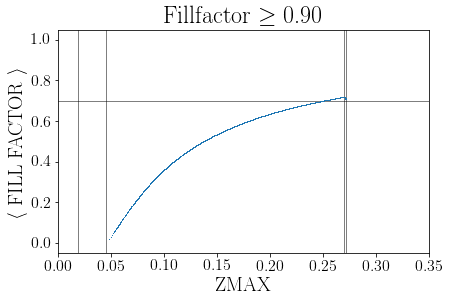

In [16]:
pl.axvline(ddp_zlimits['DDP1'][0], c='k', lw=0.5)
pl.axvline(ddp_zlimits['DDP1'][1], c='k', lw=0.5)

pl.axvline(gama_vmax.meta['FORCE_ZMIN'], c='k', lw=0.5) 
pl.axvline(gama_vmax.meta['FORCE_ZMAX'], c='k', lw=0.5) 

pl.axhline(ddp1_full8frac,   c='k', lw=0.5)

pl.plot(gama_vmax['ZMAX'], gama_vmax['FILLFACTOR_VMAX'], marker=',', lw=0.0)

pl.xlim(0.0, 0.35)
pl.ylim(-0.05, 1.05)

pl.xlabel('ZMAX')
pl.ylabel(r'$\langle$ FILL FACTOR $\rangle$')

pl.title(r'Fillfactor $\geq$ {:.2f}'.format(fillfactor_threshold))



Solving for volume average fillfactor.
Fetching /cosma/home/durham/dc-wils7/data/GAMA4/randoms/randoms_ddp1_bd_ddp_n8_G9_0.fits.
Fetching /cosma/home/durham/dc-wils7/data/GAMA4/randoms/randoms_ddp1_bd_ddp_n8_G12_0.fits.
Fetching /cosma/home/durham/dc-wils7/data/GAMA4/randoms/randoms_ddp1_bd_ddp_n8_G15_0.fits.
Randoms 0.019032 <= z <= 0.271510


Solving for volume average fillfactor.
Fetching /cosma/home/durham/dc-wils7/data/GAMA4/randoms/randoms_ddp1_bd_ddp_n8_G9_0.fits.
Fetching /cosma/home/durham/dc-wils7/data/GAMA4/randoms/randoms_ddp1_bd_ddp_n8_G12_0.fits.
Fetching /cosma/home/durham/dc-wils7/data/GAMA4/randoms/randoms_ddp1_bd_ddp_n8_G15_0.fits.


/tmp/ipykernel_131300/2743695392.py:17: RuntimeWarning: invalid value encountered in true_divide
  return (cut_splint(zmax) - cut_splint(zmin)) / (vol_splint(zmax) - vol_splint(zmin))


Randoms 0.019869 <= z <= 0.271510


Solving for volume average fillfactor.
Fetching /cosma/home/durham/dc-wils7/data/GAMA4/randoms/randoms_ddp1_bd_ddp_n8_G9_0.fits.
Fetching /cosma/home/durham/dc-wils7/data/GAMA4/randoms/randoms_ddp1_bd_ddp_n8_G12_0.fits.
Fetching /cosma/home/durham/dc-wils7/data/GAMA4/randoms/randoms_ddp1_bd_ddp_n8_G15_0.fits.


/tmp/ipykernel_131300/2743695392.py:17: RuntimeWarning: invalid value encountered in true_divide
  return (cut_splint(zmax) - cut_splint(zmin)) / (vol_splint(zmax) - vol_splint(zmin))


Randoms 0.020597 <= z <= 0.271510


/tmp/ipykernel_131300/2743695392.py:17: RuntimeWarning: invalid value encountered in true_divide
  return (cut_splint(zmax) - cut_splint(zmin)) / (vol_splint(zmax) - vol_splint(zmin))




Solving for volume average fillfactor.
Fetching /cosma/home/durham/dc-wils7/data/GAMA4/randoms/randoms_ddp1_bd_ddp_n8_G9_0.fits.
Fetching /cosma/home/durham/dc-wils7/data/GAMA4/randoms/randoms_ddp1_bd_ddp_n8_G12_0.fits.
Fetching /cosma/home/durham/dc-wils7/data/GAMA4/randoms/randoms_ddp1_bd_ddp_n8_G15_0.fits.
Randoms 0.021696 <= z <= 0.271510


/tmp/ipykernel_131300/2743695392.py:17: RuntimeWarning: invalid value encountered in true_divide
  return (cut_splint(zmax) - cut_splint(zmin)) / (vol_splint(zmax) - vol_splint(zmin))




Solving for volume average fillfactor.
Fetching /cosma/home/durham/dc-wils7/data/GAMA4/randoms/randoms_ddp1_bd_ddp_n8_G9_0.fits.
Fetching /cosma/home/durham/dc-wils7/data/GAMA4/randoms/randoms_ddp1_bd_ddp_n8_G12_0.fits.
Fetching /cosma/home/durham/dc-wils7/data/GAMA4/randoms/randoms_ddp1_bd_ddp_n8_G15_0.fits.
Randoms 0.021971 <= z <= 0.271510


/tmp/ipykernel_131300/2743695392.py:17: RuntimeWarning: invalid value encountered in true_divide
  return (cut_splint(zmax) - cut_splint(zmin)) / (vol_splint(zmax) - vol_splint(zmin))




Solving for volume average fillfactor.
Fetching /cosma/home/durham/dc-wils7/data/GAMA4/randoms/randoms_ddp1_bd_ddp_n8_G9_0.fits.
Fetching /cosma/home/durham/dc-wils7/data/GAMA4/randoms/randoms_ddp1_bd_ddp_n8_G12_0.fits.
Fetching /cosma/home/durham/dc-wils7/data/GAMA4/randoms/randoms_ddp1_bd_ddp_n8_G15_0.fits.
Randoms 0.022077 <= z <= 0.271510


/tmp/ipykernel_131300/2743695392.py:17: RuntimeWarning: invalid value encountered in true_divide
  return (cut_splint(zmax) - cut_splint(zmin)) / (vol_splint(zmax) - vol_splint(zmin))




Solving for volume average fillfactor.
Fetching /cosma/home/durham/dc-wils7/data/GAMA4/randoms/randoms_ddp1_bd_ddp_n8_G9_0.fits.
Fetching /cosma/home/durham/dc-wils7/data/GAMA4/randoms/randoms_ddp1_bd_ddp_n8_G12_0.fits.
Fetching /cosma/home/durham/dc-wils7/data/GAMA4/randoms/randoms_ddp1_bd_ddp_n8_G15_0.fits.
Randoms 0.022296 <= z <= 0.271510


/tmp/ipykernel_131300/2743695392.py:17: RuntimeWarning: invalid value encountered in true_divide
  return (cut_splint(zmax) - cut_splint(zmin)) / (vol_splint(zmax) - vol_splint(zmin))




Solving for volume average fillfactor.
Fetching /cosma/home/durham/dc-wils7/data/GAMA4/randoms/randoms_ddp1_bd_ddp_n8_G9_0.fits.
Fetching /cosma/home/durham/dc-wils7/data/GAMA4/randoms/randoms_ddp1_bd_ddp_n8_G12_0.fits.
Fetching /cosma/home/durham/dc-wils7/data/GAMA4/randoms/randoms_ddp1_bd_ddp_n8_G15_0.fits.
Randoms 0.021446 <= z <= 0.271510


/tmp/ipykernel_131300/2743695392.py:17: RuntimeWarning: invalid value encountered in true_divide
  return (cut_splint(zmax) - cut_splint(zmin)) / (vol_splint(zmax) - vol_splint(zmin))


Text(0.5, 1.0, 'Fillfactor $\\geq$ 0.90')

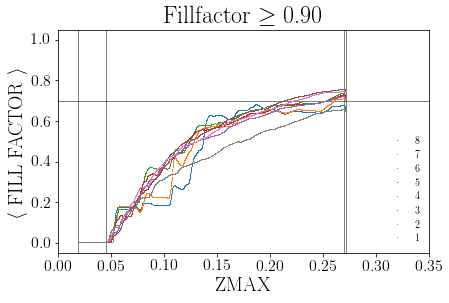

In [23]:
pl.axvline(ddp_zlimits['DDP1'][0], c='k', lw=0.5)
pl.axvline(ddp_zlimits['DDP1'][1], c='k', lw=0.5)

pl.axvline(gama_vmax.meta['FORCE_ZMIN'], c='k', lw=0.5) 
pl.axvline(gama_vmax.meta['FORCE_ZMAX'], c='k', lw=0.5) 

pl.axhline(ddp1_full8frac,   c='k', lw=0.5)
    
zs = np.arange(ddp_zlimits['DDP1'][0], ddp_zlimits['DDP1'][1], 1.e-4)
    
for tier in np.arange(8, 0, -1):
    vol_splint, cut_splint = volavg_fillfactor(survey='gama', ftype='randoms_bd_ddp_n8',\
                                               dryrun=False, prefix='randoms_ddp1', write=False,\
                                               field='G9', tier=tier)
    
    def _eval_volavg_fillfactor(zmax, zmin):
        return (cut_splint(zmax) - cut_splint(zmin)) / (vol_splint(zmax) - vol_splint(zmin))
    
    pl.plot(zs, _eval_volavg_fillfactor(zs, ddp_zlimits['DDP1'][0]), marker=',', lw=0.0, label=tier)
    
pl.xlim(0.0, 0.35)
pl.ylim(-0.05, 1.05)

pl.xlabel('ZMAX')
pl.ylabel(r'$\langle$ FILL FACTOR $\rangle$')

pl.legend(frameon=False)

pl.title(r'Fillfactor $\geq$ {:.2f}'.format(fillfactor_threshold))

(0.2, 1.03)

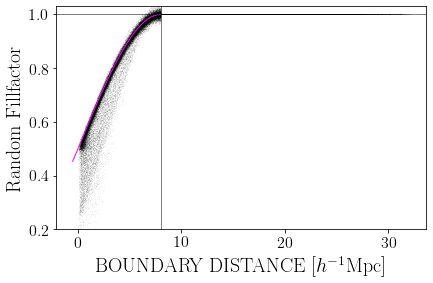

In [19]:
bds = np.arange(-0.5, 8., 0.01)

pl.plot(bds, fillfactor_expectation(bds), lw=1., c='magenta')

pl.scatter(gama_ddp['BOUND_DIST'], gama_ddp['FILLFACTOR'], marker='.', lw=0.0, s=2, alpha=0.05, c='k')

pl.xlabel('BOUNDARY DISTANCE [$h^{-1}$Mpc]')
pl.ylabel(r'Random Fillfactor')

pl.axhline(1.00, c='k', lw=0.5)
pl.axvline(8.00, c='k', lw=0.5)

pl.ylim(0.2, 1.03)

(0.2, 1.03)

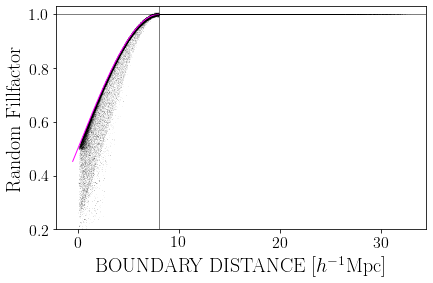

In [20]:
bds = np.arange(-0.5, 8., 0.01)

pl.plot(bds, fillfactor_expectation(bds), lw=1., c='magenta')

pl.scatter(gama_ddp['rBOUND_DIST'], gama_ddp['rFILLFACTOR'], marker='.', lw=0.0, s=2, alpha=0.05, c='k')

pl.xlabel('BOUNDARY DISTANCE [$h^{-1}$Mpc]')
pl.ylabel(r'Random Fillfactor')

pl.axhline(1.00, c='k', lw=0.5)
pl.axvline(8.00, c='k', lw=0.5)

pl.ylim(0.2, 1.03)

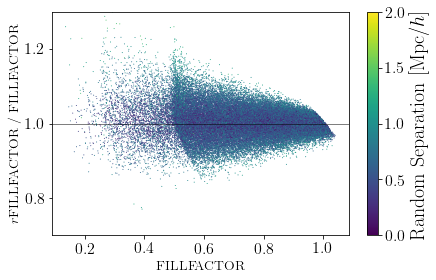

In [21]:
pl.axhline(1.0, c='k', lw=0.5)
pl.scatter(gama_ddp['FILLFACTOR'], gama_ddp['rFILLFACTOR'] / gama_ddp['FILLFACTOR'], lw=0.0, marker='.', s=4, c=gama_ddp['rRANDSEP'], vmin=0., vmax=2.)

pl.ylim(0.7, 1.3)

pl.xlabel('FILLFACTOR', fontsize=14)
pl.ylabel(r'$r$FILLFACTOR / FILLFACTOR', fontsize=14)

pl.colorbar(label='Random Separation [Mpc/$h$]')

Text(0, 0.5, '$r$BOUND_DIST')

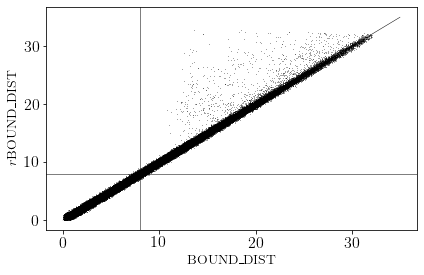

In [22]:
us = np.logspace(-2., np.log10(35.), 20)

pl.axvline(8.0, c='k', lw=0.5)
pl.axhline(8.0, c='k', lw=0.5)

pl.plot(us, us, c='k', lw=0.5)

pl.scatter(gama_ddp['BOUND_DIST'], gama_ddp['rBOUND_DIST'], lw=0.0, marker='.', s=1, c='k', vmin=0., vmax=.6)

pl.xlabel('BOUND_DIST', fontsize=14)
pl.ylabel(r'$r$BOUND_DIST', fontsize=14)

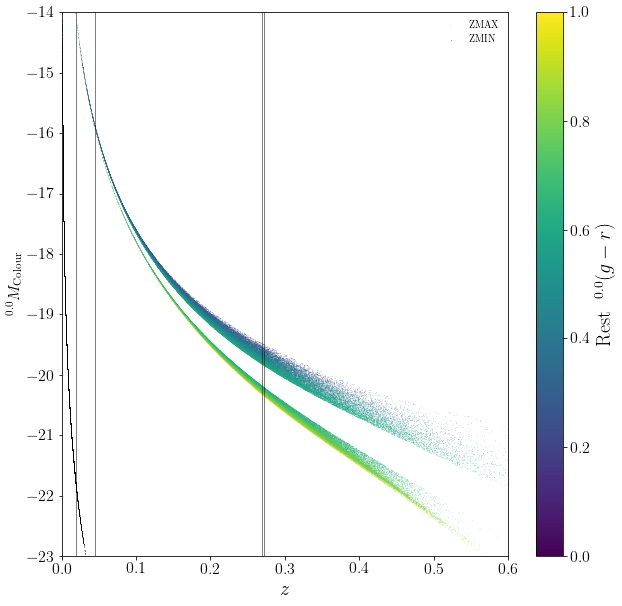

In [23]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

ax.axvline(ddp_zlimits['DDP1'][0], c='k', lw=0.5)
ax.axvline(ddp_zlimits['DDP1'][1], c='k', lw=0.5)

ax.axvline(gama_vmax.meta['FORCE_ZMIN'], c='k', lw=0.5) 
ax.axvline(gama_vmax.meta['FORCE_ZMAX'], c='k', lw=0.5) 

sc      = ax.scatter(gama_zmax['ZMAX'], gama_zmax['MCOLOR_0P0'], marker='.', lw=0.0, s=1, c=gama_zmax['REST_GMR_0P0'], vmin=0.0, vmax=1.0, label='ZMAX')
sc      = ax.scatter(gama_zmax['ZMIN'], gama_zmax['MCOLOR_0P0'], marker='.', lw=0.0, s=1, c='k', vmin=0.0, vmax=1.0, label='ZMIN')

ax.set_xlim(0.0,   0.6)
ax.set_ylim(-23., -14.)

ax.set_xlabel(r'$z$')
ax.set_ylabel(r'$^{0.0}M_{\rm Colour}$', fontsize=16)

ax.legend(frameon=False)

plt.colorbar(sc, label='Rest \ $^{0.0}(g-r)$')

Text(0, 0.5, 'DEC [deg.]')

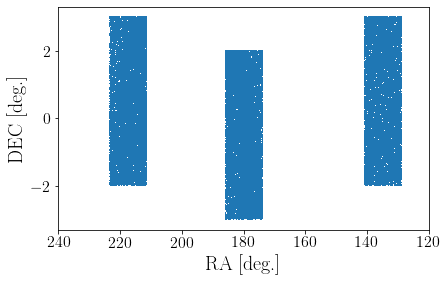

In [25]:
pl.plot(gama_zmax['RA'], gama_zmax['DEC'], marker=',', lw=0.0)

pl.xlim(240., 120.)

pl.xlabel('RA [deg.]')
pl.ylabel('DEC [deg.]')

In [26]:
fpath   = findfile(ftype='lumfn', dryrun=dryrun, version=version, survey=survey)
gama_lf = Table.read(fpath)
gama_lf

MEDIAN_M,MEAN_M,MID_M,IVMAXMEAN_M,PHI_N,PHI_N_ERROR,PHI_IVMAX,PHI_IVMAX_ERROR,N,V_ON_VMAX
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
-22.9,-22.9,-22.9,-22.9,0.0,0.0,0.0,0.0,0.0,0.0
-22.831925312129783,-22.864672608757225,-22.7,-22.864682184297706,4.91349269247146e-06,1.7371820010785586e-06,6.848633004974947e-06,2.4213574455130194e-06,8.0,0.7174947235627481
-22.704044909575536,-22.69803884734222,-22.5,-22.698044339625408,3.193770250106449e-05,4.428962461080866e-06,4.450162559544417e-05,6.171265141827296e-06,52.0,0.717672352199408
-22.46463274592758,-22.481083738461145,-22.299999999999997,-22.481088482250815,5.589097937686286e-05,5.8589666190302775e-06,7.785198598263439e-05,8.161105667388297e-06,91.0,0.7179316171089624
-22.285094947604357,-22.290651532969026,-22.099999999999998,-22.29065505666599,0.00011485289168652037,8.398875252161253e-06,0.00015994620567208912,1.1696424976557623e-05,187.0,0.7180783522643194
-22.096814637488745,-22.096086917259054,-21.9,-22.09608959454204,0.0002266348504402461,1.1798139056104947e-05,0.0003155604918285646,1.642742305487094e-05,369.0,0.7181993379506572
-21.885638324898856,-21.890440237315442,-21.7,-21.89044221873559,0.0003986070946767472,1.564669712296127e-05,0.0005549315144009405,2.1782967365613184e-05,649.0,0.7183027955262968
-21.68767578779024,-21.691121328191194,-21.5,-21.69112133240641,0.0006448959158868792,1.9901920039643376e-05,0.0008977614247817831,2.7705519062118137e-05,1050.0,0.7183377725396491
-21.490116210238114,-21.493112284852565,-21.299999999999997,-21.493112284852575,0.0010564009288813638,2.5472088264359688e-05,0.0014706186549908245,3.545976452596155e-05,1720.0,0.7183377725396491


Text(0.5, 0, '$V/V_{Max}$')

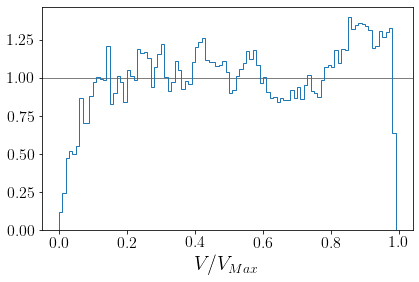

In [26]:
pl.axhline(1., c='k', lw=0.5)

_ = pl.hist(gama_vmax['VZ'] / gama_vmax['VMAX'], bins=np.arange(0.0, 1.0, 0.01), histtype='step', density=True)

pl.xlabel('$V/V_{Max}$')

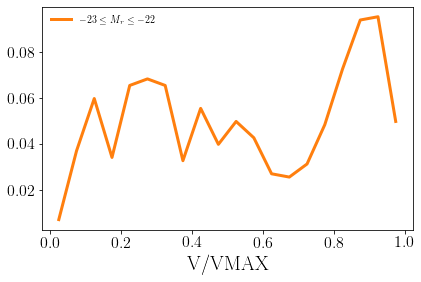

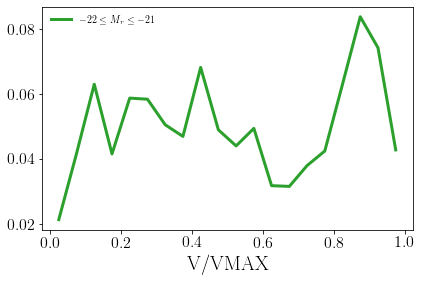

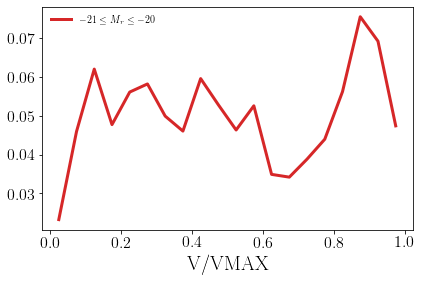

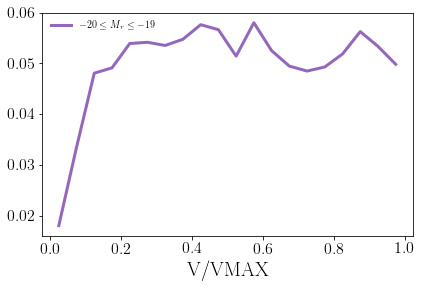

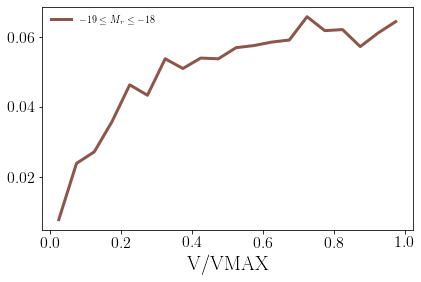

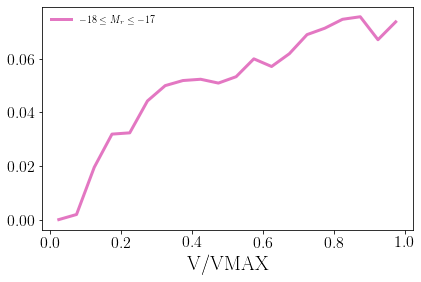

In [25]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
idx    = np.digitize(gama_vmax['MCOLOR_0P0'], np.arange(-23., -17., 1.))

for count, jj in enumerate(np.unique(idx)):
    sample = gama_vmax[(idx == jj) & (gama_vmax['MCOLOR_0P0'].data >= -23.) & (gama_vmax['MCOLOR_0P0'].data <= -17.)]
    nsample = len(sample)

    if nsample == 0:
        continue
    
    dbin = 0.05
    bins = np.arange(0., 1.001, dbin)
    
    ns, _ = np.histogram(sample['VZ'] / sample['VMAX'], bins=bins)
    
    centres = bins[:-1] + dbin/2.
    
    plt.plot(centres, ns / nsample, color=colors[count], label=r'${:.0f} \leq M_r \leq {:.0f}$'.format(sample['MCOLOR_0P0'].min(),\
                                                                                                       sample['MCOLOR_0P0'].max()))

    plt.xlabel('V/VMAX')
    plt.legend(frameon=False)
    
    pl.show()

In [26]:
spurious = gama_zmax[gama_zmax['REST_GMR_0P1_WARN'] > 0.0]
spurious.sort('GMR')
spurious

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,ZSURV,LUMDIST,DISTMOD,FIELD,IN_D8LUMFN,CONSERVATIVE,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,ROTCARTESIAN_X,ROTCARTESIAN_Y,ROTCARTESIAN_Z,GMR,DETMAG,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,MQZERO_0P0,Z_THETA_QALL,Z_THETA_QZERO,Z_THETA_QCOLOR,DDPKCORR_R0P1,DDPKCORR_G0P1,DDPKCORR_R0P0,DDPKCORR_G0P0,DDPMALL_0P0,DELTA_DETMAG_FAINT,ZMAX,ZMAX_WARN,DELTA_DETMAG_BRIGHT,ZMIN,ZMIN_WARN,VMAX
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,,Mpc,,,,,,,,,,,mag,mag,,,,,,,,mag,mag,,,mag,mag,mag,,,,,,,,mag,mag,,,mag,,,
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float32,float64,float64,bytes3,int64,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,int32,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float32,float64,float64,float64
84548,587722983886881328,178.41186365,0.53094523,19.129574,0.14889,4,G12_Y2_042_085,6,28.227417,29.744629,18.847836,29.051346,23.953873,0.14889,497.94976691080626,38.48592766707365,G12,0,0,-433.23304428929094,12.01152005870378,4.016316713129331,433.142899165352,-15.032094939512701,3.5416242870717847,10.896793,19.129574,-99.0,2,1,-0.13889772296610337,-0.0765818069362224,0.022382996340270717,0.051262804552402355,10.867913557266384,0.8,-0.1444233,-0.11911201,-19.234313535404127,-19.25962483407251,-19.37873684139244,38.36388735742561,38.50831066341392,38.389198656093996,-0.07153357457968779,0.01002668527675725,0.14519130378251333,0.27520197499042054,-19.35712184284637,0.6704254,0.2045565206929093,0.0,-7.129574,0.0059108656363813005,0.0,3725782.2344622263


In [27]:
spurious = gama_zmax[gama_zmax['ZMAX_WARN'] > 0.0]
spurious.sort('R_PETRO')
spurious

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,ZSURV,LUMDIST,DISTMOD,FIELD,IN_D8LUMFN,CONSERVATIVE,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,ROTCARTESIAN_X,ROTCARTESIAN_Y,ROTCARTESIAN_Z,GMR,DETMAG,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,MQZERO_0P0,Z_THETA_QALL,Z_THETA_QZERO,Z_THETA_QCOLOR,DDPKCORR_R0P1,DDPKCORR_G0P1,DDPKCORR_R0P0,DDPKCORR_G0P0,DDPMALL_0P0,DELTA_DETMAG_FAINT,ZMAX,ZMAX_WARN,DELTA_DETMAG_BRIGHT,ZMIN,ZMIN_WARN,VMAX
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,,Mpc,,,,,,,,,,,mag,mag,,,,,,,,mag,mag,,,mag,mag,mag,,,,,,,,mag,mag,,,mag,,,
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float32,float64,float64,bytes3,int64,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,int32,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float32,float64,float64,float64
78982,587722983367966779,219.43813423,0.07880795,17.586954,0.21069,5,345782141184927744,6,18.2645,17.868378,17.567848,17.333746,17.30042,0.21069,732.9414969320795,39.32534655415001,G15,0,0,-467.5500709858969,-384.5713910261141,0.8326904983070628,470.2208914811346,381.3018876752127,0.3173612299916374,0.30052948,17.586954,0.13170774822191056,0,1,-0.19619757487891137,-0.027375843120353183,-0.034880126871333295,0.10071625950984983,0.16493309359928562,2.12,-0.2043693,-0.44666278,-21.499143003893057,-21.256849526834646,-21.703512310457388,39.08609712071434,39.29046642727867,38.84380364365593,-0.03977202648651637,0.1744464956821029,0.17695285187568474,0.4396217853957662,-21.710975982640075,2.2130451,-99.0,1.0,-5.586954,0.014802823191502936,0.0,--


In [28]:
spurious = gama_zmax[gama_zmax['ZMIN_WARN'] > 0.0]
spurious.sort('R_PETRO')
spurious

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,ZSURV,LUMDIST,DISTMOD,FIELD,IN_D8LUMFN,CONSERVATIVE,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,ROTCARTESIAN_X,ROTCARTESIAN_Y,ROTCARTESIAN_Z,GMR,DETMAG,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,MQZERO_0P0,Z_THETA_QALL,Z_THETA_QZERO,Z_THETA_QCOLOR,DDPKCORR_R0P1,DDPKCORR_G0P1,DDPKCORR_R0P0,DDPKCORR_G0P0,DDPMALL_0P0,DELTA_DETMAG_FAINT,ZMAX,ZMAX_WARN,DELTA_DETMAG_BRIGHT,ZMIN,ZMIN_WARN,VMAX
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,,Mpc,,,,,,,,,,,mag,mag,,,,,,,,mag,mag,,,mag,mag,mag,,,,,,,,mag,mag,,,mag,,,
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float32,float64,float64,bytes3,int64,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,int32,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float32,float64,float64,float64


# Done.